
# Introduction

## Importance of this dataset

One of the most common cancers in women is breast cancer. The development of genetic programming and machine learning over the past decades has greatly increased the accuracy of breast cancer detection, more so than imaging techniques, despite the fact that multiple imaging techniques have been implemented for the diagnosis and therapy of breast cancer. Massive amounts of mammography images have been handled by the system to help better the visibility of peripheral regions and intensity distribution, and several techniques have been documented to aid in this process. This has made interpretation and analysis easier. Feature extraction, which can distinguish between normal and malignant tumors, is one of the most crucial steps in the discovery of breast cancer. 

# Objective

1. Finding correlation between cancer radius, texture,parimeter, compactness, etc and determining whether the cancer is malignant or benign.
2. Analysing the correlation to find the relationship between these variables and make a model that predicts whether the cancer is malignant or benign.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%run dqr.py

In [2]:
df=pd.read_csv("/Users/macmojave/Downloads/BreastCancer Data with OutliersDuplicateAndMissingValues.csv")

In [3]:
df

,id,diagnosis,diagnosis_numeric,radius,texture,perimeter,area,smoothness,compactness,concavity,...,radius_worse,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,8510426.0,B,0.0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653.0,B,NaN,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824.0,B,NaN,9.504,12.44,60.34,NaN,0.10240,0.06492,0.02956,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941.0,B,NaN,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,85713702.0,B,NaN,8.196,16.84,51.71,201.9,NaN,0.05943,0.01588,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,926125.0,M,1.0,20.920,25.09,143.00,1347.0,0.10990,0.22360,NaN,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873
574,926424.0,M,1.0,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
575,926682.0,M,1.0,20.130,28.25,131.20,1261.0,NaN,0.10340,0.14400,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
576,926954.0,M,1.0,16.600,NaN,108.30,858.1,0.08455,0.10230,0.09251,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [4]:
#Data size
#Data shape
#Data dimensions

print(df.size)
print(df.shape)
print(df.ndim)

19074
(578, 33)
2


In [5]:
print(df.columns)

Index(['id', 'diagnosis', 'diagnosis_numeric', 'radius', 'texture',
       'perimeter', 'area', 'smoothness', 'compactness', 'concavity',
       'concave_points', 'symmetry', 'fractal_dimension', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worse', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [6]:
df['diagnosis'].value_counts()

#The diagnosis of breast tissues (M = malignant, B = benign)
#Tumors can be benign (non-cancerous) or malignant (cancerous). Benign tumors tend to grow slowly and do not spread. 
#Malignant tumors can grow rapidly, invade and destroy nearby normal tissues, and spread throughout the body.

B    359
M    219
Name: diagnosis, dtype: int64

/Users/macmojave/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


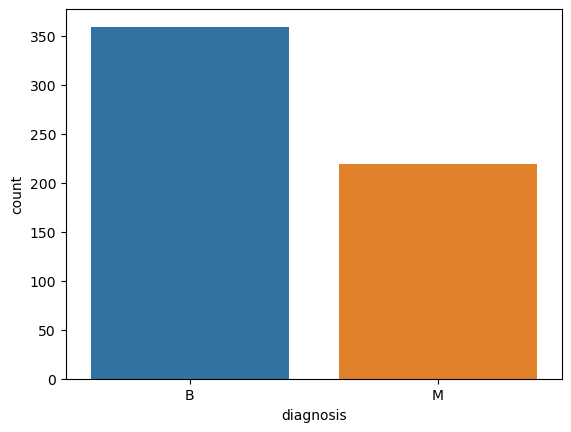

In [7]:
#visualize the count
sb.countplot(df.diagnosis,label="count")
plt.show()

In [8]:
#Correctly inputting diagnosis numeric values based on diagnosis

for i in df['diagnosis']:
        df['diagnosis_numeric']=np.where(df['diagnosis']=='B',0,1)

In [9]:
df[['diagnosis','diagnosis_numeric']]

,diagnosis,diagnosis_numeric
0,B,0
1,B,0
2,B,0
3,B,0
4,B,0
...,...,...
573,M,1
574,M,1
575,M,1
576,M,1


In [10]:
#checking null values
df.isna().sum()

id                         0
diagnosis                  0
diagnosis_numeric          0
radius                     1
texture                    2
perimeter                  1
area                       5
smoothness                 3
compactness                1
concavity                  3
concave_points             0
symmetry                   4
fractal_dimension          1
radius_se                  1
texture_se                 1
perimeter_se               0
area_se                    2
smoothness_se              2
compactness_se             2
concavity_se               1
concave_points_se          4
symmetry_se                1
fractal_dimension_se       1
radius_worse               3
texture_worst              1
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          1
concavity_worst            0
concave_points_worst       1
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
#to replace all na values with their means
df = df.fillna(df.median())

/var/folders/52/wp71vl2145x3tbq42y09h6qw0000gn/T/ipykernel_9485/697385827.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


In [12]:
#checking duplicate values
df.duplicated().sum()

0

In [13]:
df= df.dropna(axis=0)

In [14]:
df

,id,diagnosis,diagnosis_numeric,radius,texture,perimeter,area,smoothness,compactness,concavity,...,radius_worse,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,8510426.0,B,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653.0,B,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824.0,B,0,9.504,12.44,60.34,553.5,0.10240,0.06492,0.02956,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941.0,B,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,85713702.0,B,0,8.196,16.84,51.71,201.9,0.09610,0.05943,0.01588,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,926125.0,M,1,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.06335,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873
574,926424.0,M,1,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
575,926682.0,M,1,20.130,28.25,131.20,1261.0,0.09610,0.10340,0.14400,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
576,926954.0,M,1,16.600,18.89,108.30,858.1,0.08455,0.10230,0.09251,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [15]:
df['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 578 entries, 0 to 577
Series name: id
Non-Null Count  Dtype  
--------------  -----  
578 non-null    float64
dtypes: float64(1)
memory usage: 4.6 KB


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius'),
  Text(1, 0, 'texture'),
  Text(2, 0, 'perimeter'),
  Text(3, 0, 'area'),
  Text(4, 0, 'smoothness'),
  Text(5, 0, 'compactness'),
  Text(6, 0, 'concavity'),
  Text(7, 0, 'concave_points'),
  Text(8, 0, 'symmetry'),
  Text(9, 0, 'fractal_dimension')])

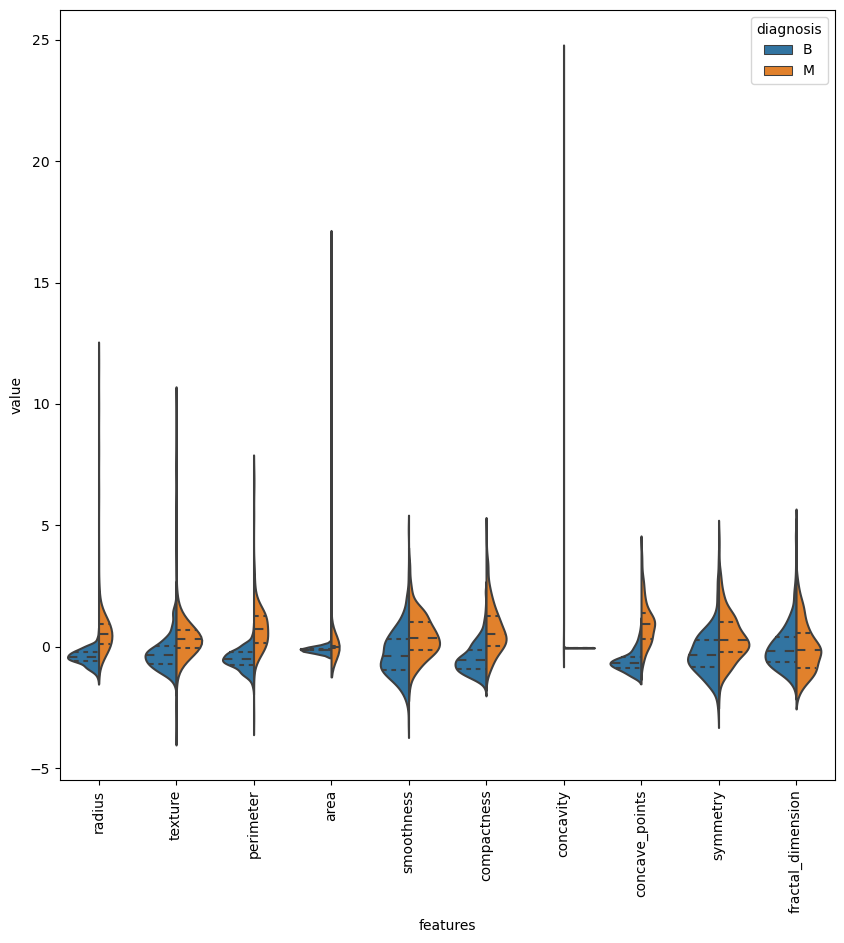

In [16]:
# y includes diagnosis column with M or B values
y = df.diagnosis
# drop the column 'id' as it is does not convey any useful info
# drop diagnosis since we are separating labels and features 
list = ['id','diagnosis',"diagnosis_numeric"]
# X includes our features
X = df.drop(list,axis = 1)
# get the first ten features
data_dia = y
data = X
data_std = (data - data.mean()) / (data.std()) # standardization
# get the first 10 features
data = pd.concat([y,data_std.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
 var_name="features",
 value_name='value')
# make a violin plot
plt.figure(figsize=(10,10))
sb.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave_points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

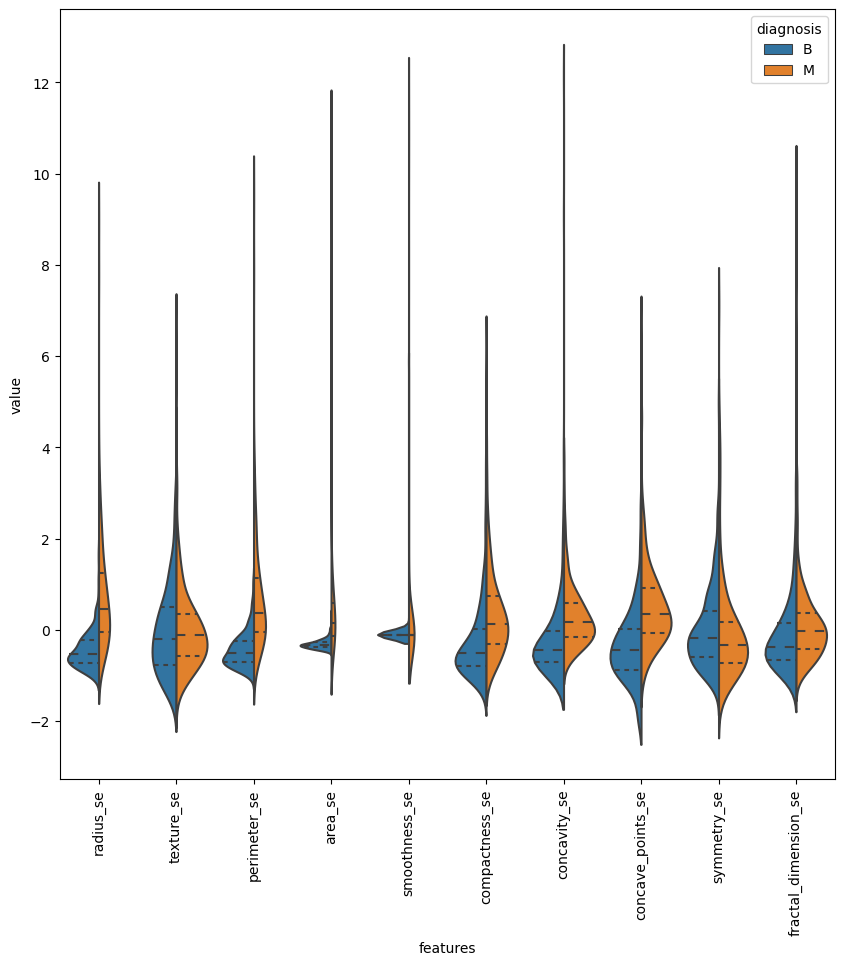

In [17]:
# # y includes diagnosis column with M or B values
# y = df.diagnosis
# # drop the column 'id' as it is does not convey any useful info
# # drop diagnosis since we are separating labels and features 
# list = ['id','diagnosis',"diagnosis_numeric"]
# # X includes our features
# X = df.drop(list,axis = 1)
# # get the first ten features
# data_dia = y
# data = X
# data_std = (data - data.mean()) / (data.std()) # standardization
# get the first 10 features
data = pd.concat([y,data_std.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
 var_name="features",
 value_name='value')
# make a violin plot
plt.figure(figsize=(10,10))
sb.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worse'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave_points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

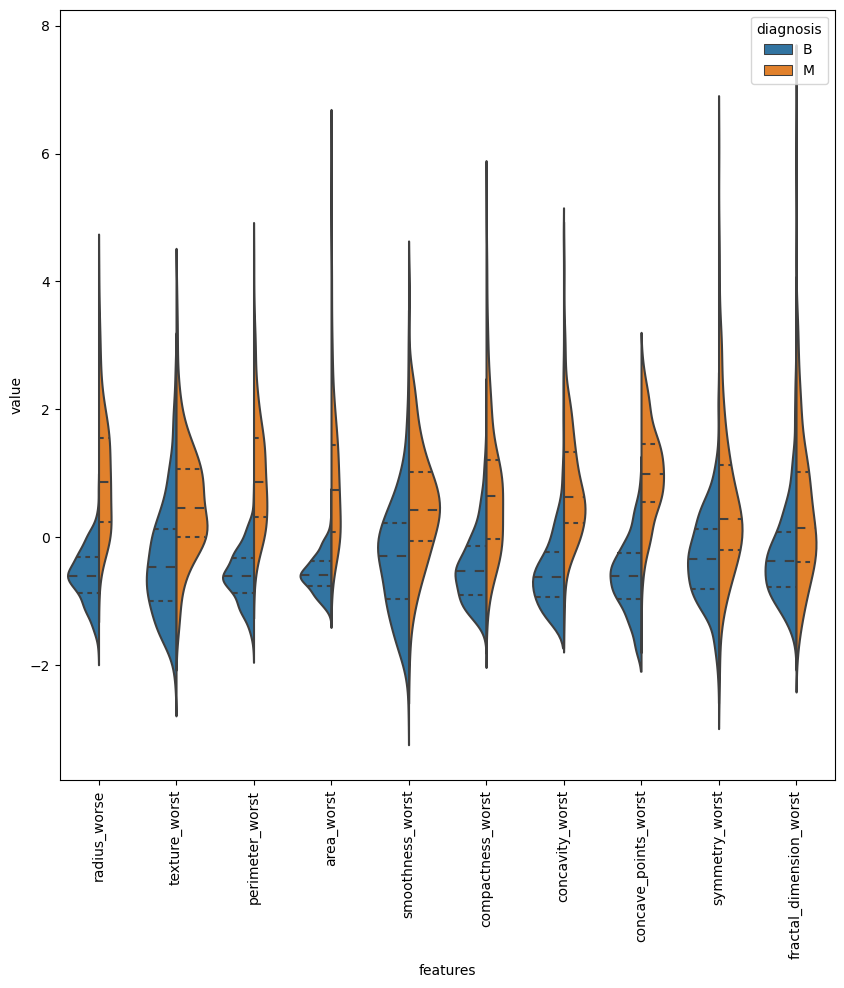

In [18]:
# # y includes diagnosis column with M or B values
# y = df.diagnosis
# # drop the column 'id' as it is does not convey any useful info
# # drop diagnosis since we are separating labels and features 
# list = ['id','diagnosis',"diagnosis_numeric"]
# # X includes our features
# X = df.drop(list,axis = 1)
# # get the first ten features
# data_dia = y
# data = X
# data_std = (data - data.mean()) / (data.std()) # standardization
# get the first 10 features
data = pd.concat([y,data_std.iloc[:,20:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
 var_name="features",
 value_name='value')
# make a violin plot
plt.figure(figsize=(10,10))
sb.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

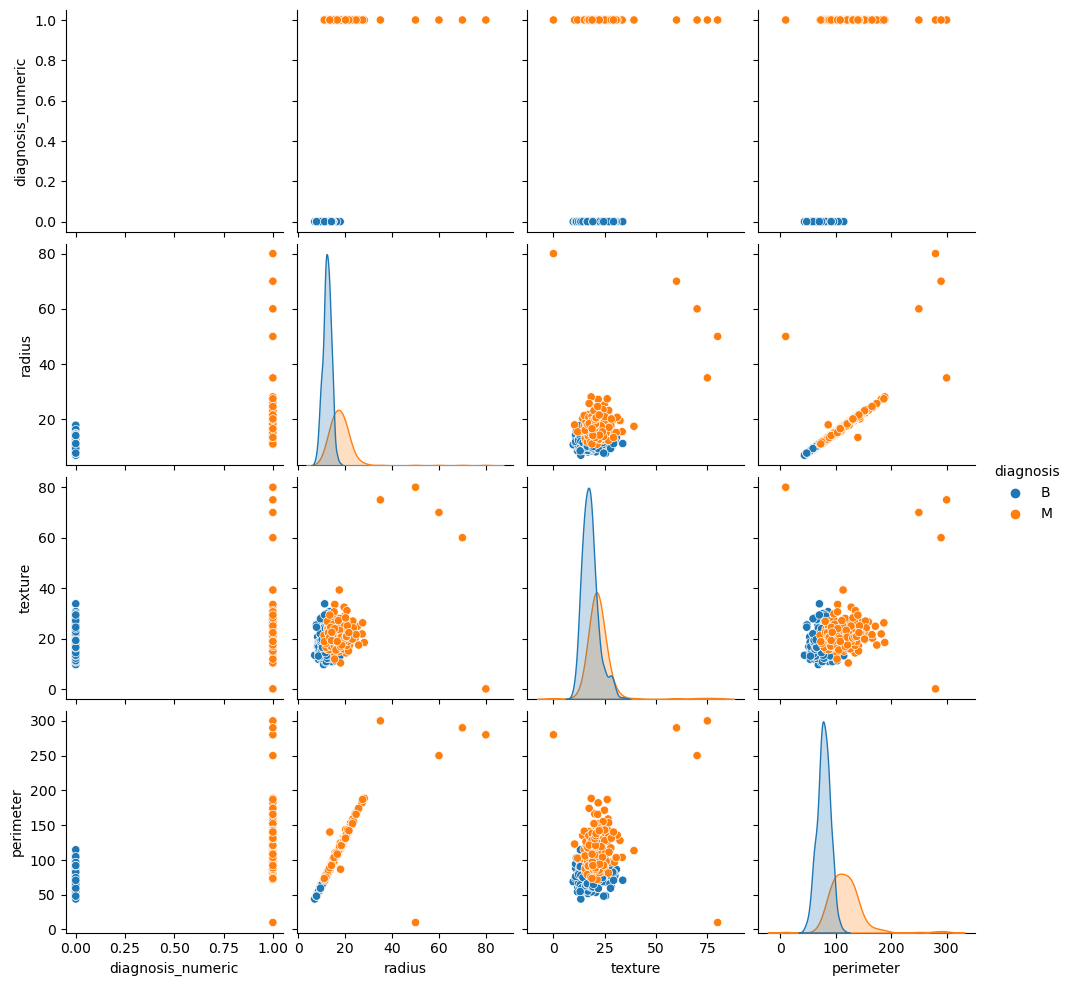

In [19]:
sb.pairplot(df.iloc[:,1:6],hue="diagnosis")
plt.show()

In [20]:
r1= dataQuality(df)

In [21]:
r1['categorical']

,Count,Unique,Miss_per,Freq_Level,freq_cat_Per
diagnosis,578,2,0.0,B,0.621107


In [22]:
r1['numeric']

,Count,Unique,Miss_per,Min,Max,Mean,Median,Std,Q1,Q3,q99
id,578.0,578.0,0.0,8670.000000,1.212120e+12,2.127016e+09,906414.500000,5.041645e+10,869219.500000,8.812869e+06,9.033626e+08
diagnosis_numeric,578.0,2.0,0.0,0.000000,1.000000e+00,3.788927e-01,0.000000,4.855316e-01,0.000000,1.000000e+00,1.000000e+00
symmetry_worst,578.0,501.0,0.0,0.156500,6.638000e-01,2.900756e-01,0.282700,6.138307e-02,0.250700,3.174750e-01,4.867370e-01
concave_points_worst,578.0,492.0,0.0,0.000000,2.910000e-01,1.144748e-01,0.101500,6.516891e-02,0.065035,1.608500e-01,2.690990e-01
concavity_worst,578.0,540.0,0.0,0.000000,1.252000e+00,2.721885e-01,0.230050,2.069908e-01,0.116725,3.795500e-01,9.022450e-01
compactness_worst,578.0,529.0,0.0,0.027290,1.058000e+00,2.540387e-01,0.216400,1.560659e-01,0.147900,3.325500e-01,7.769160e-01
smoothness_worst,578.0,412.0,0.0,0.071170,2.226000e-01,1.323686e-01,0.131600,2.265366e-02,0.116850,1.459000e-01,1.887370e-01
area_worst,578.0,545.0,0.0,185.200000,4.254000e+03,8.805831e+02,689.000000,5.648991e+02,516.025000,1.048500e+03,2.914740e+03
perimeter_worst,578.0,515.0,0.0,50.410000,2.512000e+02,1.072612e+02,97.980000,3.333945e+01,84.367500,1.249750e+02,2.078810e+02
texture_worst,578.0,511.0,0.0,12.020000,4.954000e+01,2.567027e+01,25.470000,6.096135e+00,21.182500,2.949750e+01,4.179610e+01


In [23]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

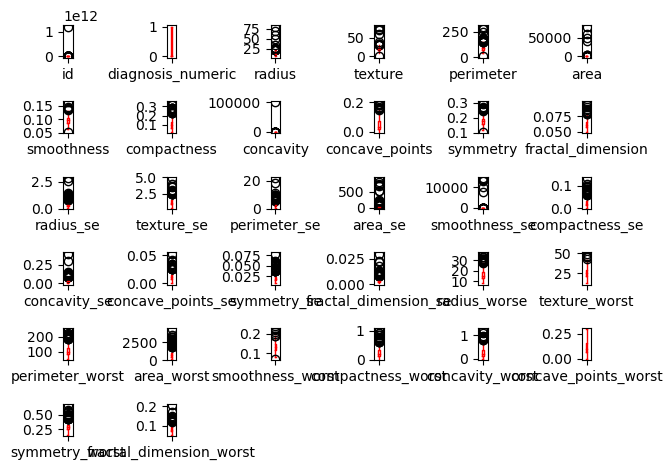

In [24]:
import matplotlib.pyplot as plt
import pandas
numeric_data.plot(kind='box',  color = 'red', subplots=True, layout=(6,6), sharex=False)
plt.tight_layout()
plt.show()

In [25]:
df.corr()

,id,diagnosis_numeric,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,...,radius_worse,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.053391,0.263295,0.409965,-0.119444,0.416269,-0.000031,0.000016,-0.000015,0.000109,...,0.000262,0.000160,0.000197,0.000264,0.000025,0.000011,0.000057,0.000102,-0.000109,-0.000073
diagnosis_numeric,0.053391,1.000000,0.534887,0.349489,0.660480,0.122691,0.350298,0.587015,-0.031958,0.767972,...,0.766045,0.450513,0.774203,0.725660,0.416775,0.582716,0.652271,0.782750,0.411662,0.320268
radius,0.263295,0.534887,1.000000,0.466676,0.851571,0.444694,0.099309,0.308429,-0.003497,0.505888,...,0.598586,0.178692,0.595415,0.581896,0.071244,0.247244,0.320744,0.456100,0.097744,-0.000546
texture,0.409965,0.349489,0.466676,1.000000,0.372211,0.604168,-0.015883,0.162953,-0.019868,0.202851,...,0.243091,0.629058,0.246442,0.236676,0.055880,0.191484,0.207950,0.202684,0.076327,0.083914
perimeter,-0.119444,0.660480,0.851571,0.372211,1.000000,0.297197,0.166949,0.463493,-0.006750,0.707285,...,0.804670,0.250676,0.806087,0.782296,0.125503,0.378063,0.469769,0.638906,0.156411,0.043306
area,0.416269,0.122691,0.444694,0.604168,0.297197,1.000000,0.011146,0.021760,-0.001288,0.048405,...,0.057815,0.012581,0.056754,0.058336,0.003915,0.012003,0.023471,0.039488,0.019765,-0.010774
smoothness,-0.000031,0.350298,0.099309,-0.015883,0.166949,0.011146,1.000000,0.652570,-0.058365,0.547876,...,0.207211,0.032909,0.233278,0.203221,0.800145,0.466027,0.425007,0.499884,0.394407,0.493954
compactness,0.000016,0.587015,0.308429,0.162953,0.463493,0.021760,0.652570,1.000000,-0.034748,0.829486,...,0.535192,0.246271,0.590505,0.512214,0.566250,0.856648,0.806955,0.810780,0.512716,0.682936
concavity,-0.000015,-0.031958,-0.003497,-0.019868,-0.006750,-0.001288,-0.058365,-0.034748,1.000000,-0.034280,...,-0.013816,-0.016947,-0.013961,-0.016501,-0.043158,-0.025573,-0.033638,-0.018279,-0.037649,-0.008584
concave_points,0.000109,0.767972,0.505888,0.202851,0.707285,0.048405,0.547876,0.829486,-0.034280,1.000000,...,0.828866,0.290535,0.855923,0.809630,0.452753,0.665328,0.752399,0.909338,0.375744,0.368661


<AxesSubplot:>

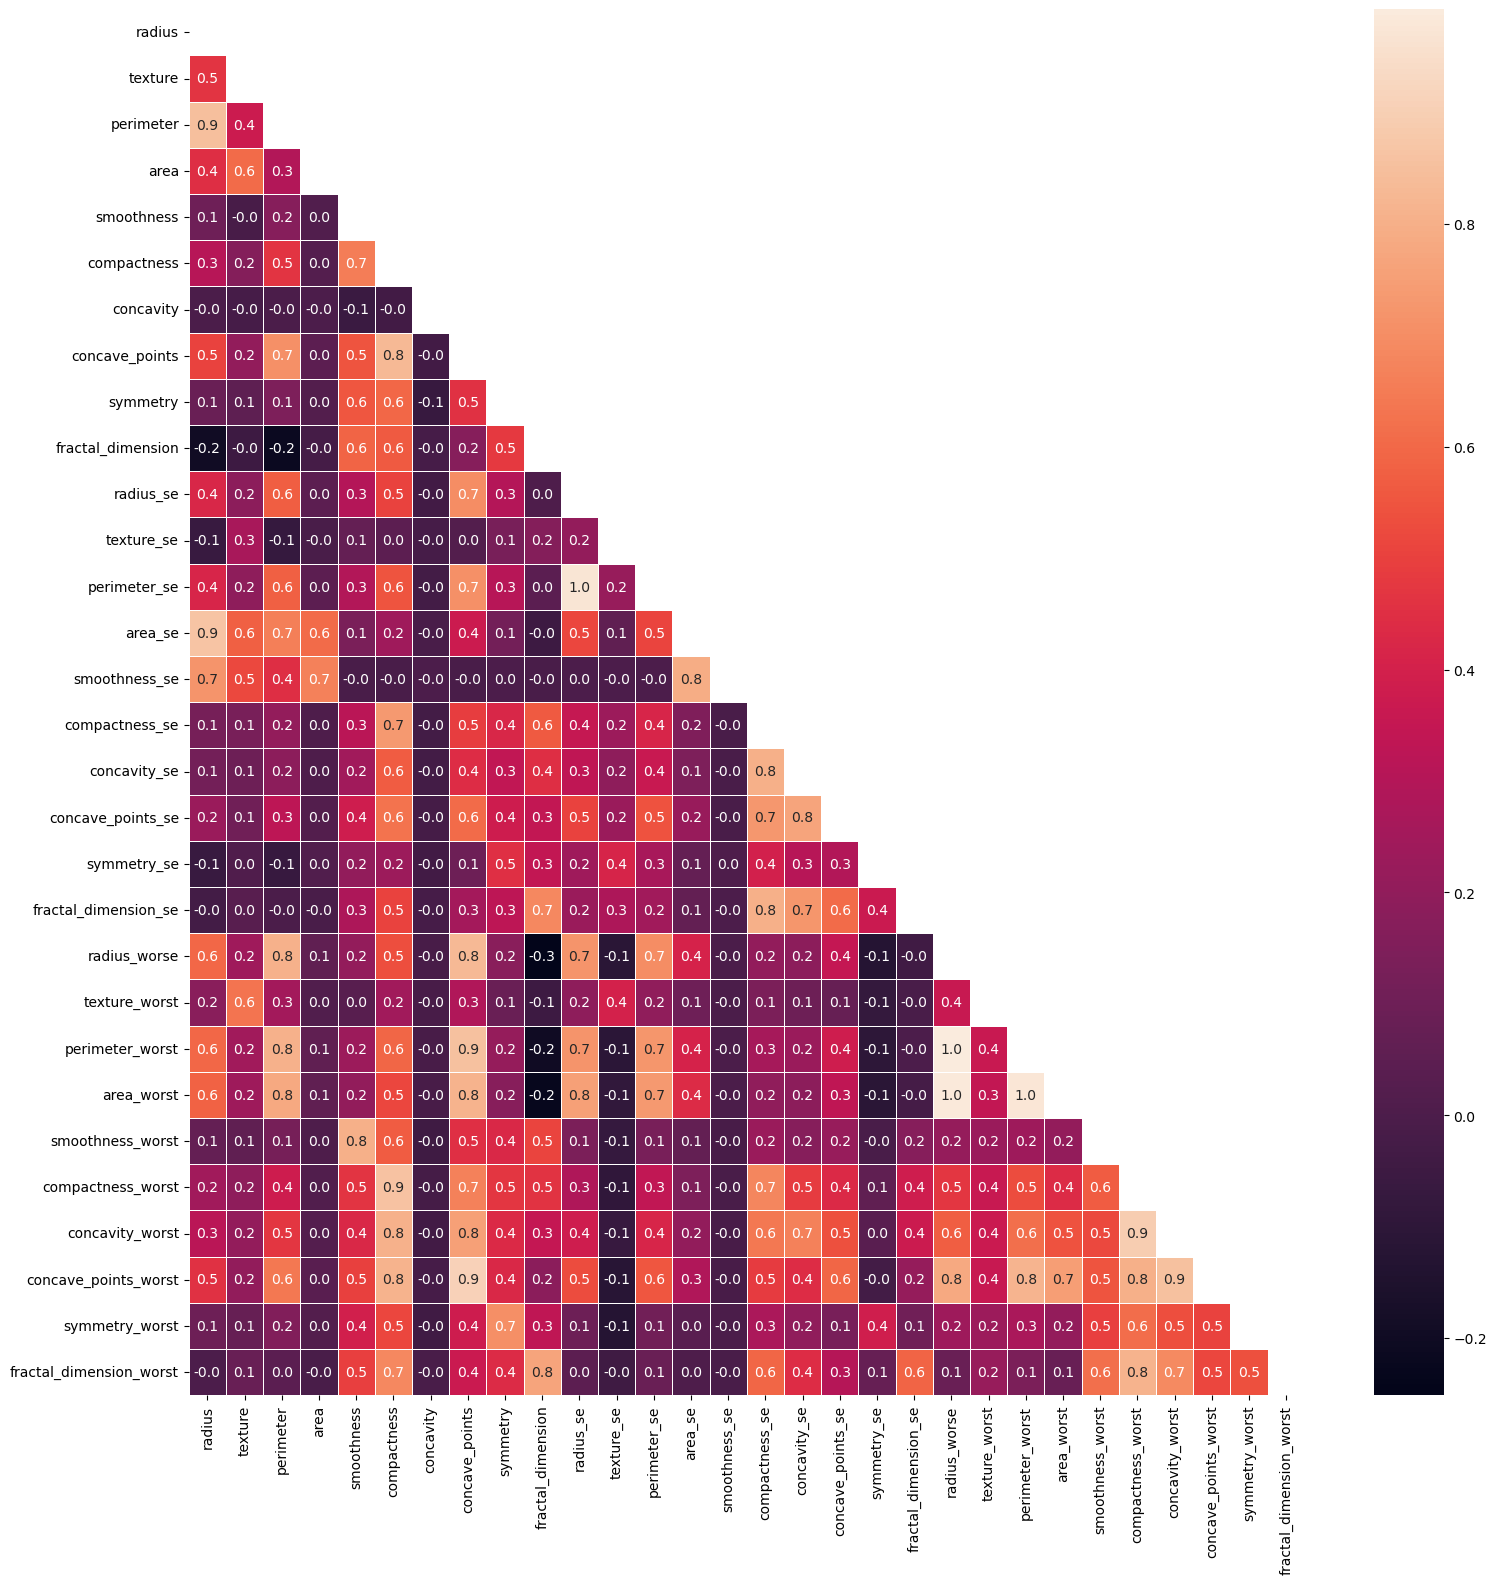

In [26]:

#correlation map
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
sb.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)


# # Set the width and height of the figure
# plt.figure(figsize=(20,18))

# corr = df.corr()
# ax = sb.heatmap(corr,vmin=-1,vmax=1,center=0,annot=False)


#sb.set(rc={'figure.figsize':(15,10)})
#sb.heatmap(data=df.corr(), annot=False, vmin=-1, vmax=1)
# Drop merch_long,merch_lat due to high correlation

In [27]:
# Create correlation matrix
corr_matrix = X.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
X = X.drop(X[to_drop], axis=1)
X.columns

/var/folders/52/wp71vl2145x3tbq42y09h6qw0000gn/T/ipykernel_9485/3199826319.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


Index(['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
       'concavity', 'concave_points', 'symmetry', 'fractal_dimension',
       'radius_se', 'texture_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worse', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [28]:
X

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension,...,symmetry_se,fractal_dimension_se,radius_worse,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.18850,0.05766,...,0.01980,0.002300,15.110,19.26,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.19670,0.06811,...,0.01678,0.002425,14.500,20.49,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,9.504,12.44,60.34,553.5,0.10240,0.06492,0.02956,0.020760,0.18150,0.06905,...,0.02027,0.002968,10.230,15.66,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.14670,0.05863,...,0.02671,0.001777,13.300,22.81,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,8.196,16.84,51.71,201.9,0.09610,0.05943,0.01588,0.005917,0.17690,0.06503,...,0.02574,0.002582,8.964,21.96,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.06335,0.147400,0.17955,0.06879,...,0.02057,0.006213,24.290,29.41,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873
574,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.17260,0.05623,...,0.01114,0.004239,25.450,26.40,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
575,20.130,28.25,131.20,1261.0,0.09610,0.10340,0.14400,0.097910,0.17955,0.05533,...,0.01879,0.002498,23.690,38.25,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
576,16.600,18.89,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.15900,0.05648,...,0.01318,0.003892,18.980,34.12,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [29]:
# plt.figure(figsize=(15,8))
# sb.distplot(df['radius'], hist=True, bins=30, color='grey')
# plt.xlabel('radius')
# plt.ylabel('Frequency')
# plt.title('Distribution of radius', fontsize=30)

In [30]:
#Visualize Pairwise relationship
#sb.pairplot(df)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify=y, random_state = 17)

In [32]:
# Define a function which trains models
def models(X_train,y_train):
    
  #Using Logistic Regression 
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    a=log.fit(X_train, y_train)
  #Using DecisionTreeClassifier 
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    b=tree.fit(X_train, y_train)
  #Using Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    c=forest.fit(X_train, y_train)
  
  #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
    print('[1]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
    print('[2]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
    
    return log, tree, forest
#get the training results
model = models(X_train,y_train)

[0]Logistic Regression Training Accuracy: 0.8852813852813853
[1]Decision Tree Classifier Training Accuracy: 0.9956709956709957
[2]Random Forest Classifier Training Accuracy: 0.9935064935064936


/Users/macmojave/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.60254442 0.21410783 0.07386245 0.03278918 0.02224501 0.01244565
 0.01103211 0.0095529  0.00935577 0.00740525 0.00465943 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


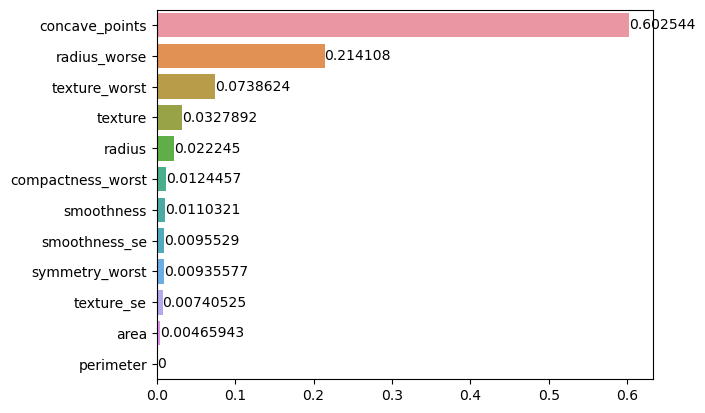

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
a=model[1].feature_importances_
print(np.sort(a)[::-1])

#use inbuilt class feature_importances of tree based classifiers
feat_importances = pd.Series(model[1].feature_importances_, index=X.columns)

#plot graph of feature importances for better visualization
# feat_importances.nlargest(10).plot(kind='barh',color=X)
# plt.show()

data=feat_importances.nlargest(12)
ax=sb.barplot(y=data.index,x=data,orient='h')
ax.bar_label(ax.containers[0])
plt.show()

In [34]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
for i in range(len(model)):
 
 cm = confusion_matrix(y_test, model[i].predict(X_test))
 
 TN = cm[0][0]
 TP = cm[1][1]
 FN = cm[1][0]
 FP = cm[0][1]
 
 print(cm)
 print('Model[{}] Testing Accuracy = “{}”'.format(i, (TP + TN) / (TP + TN + FN + FP)))
 print()# Print a new line


[[65  7]
 [10 34]]
Model[0] Testing Accuracy = “0.853448275862069”

[[70  2]
 [ 3 41]]
Model[1] Testing Accuracy = “0.9568965517241379”

[[70  2]
 [ 2 42]]
Model[2] Testing Accuracy = “0.9655172413793104”



In [35]:
#Classification Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(len(model)):
 print('Model ',i)
 #Check precision, recall, f1-score
 print(classification_report(y_test, model[i].predict(X_test)))
 #Another way to get the models accuracy on the test data
 print(accuracy_score(y_test, model[i].predict(X_test)))
 print()#Print a new line

Model  0
              precision    recall  f1-score   support

           B       0.87      0.90      0.88        72
           M       0.83      0.77      0.80        44

    accuracy                           0.85       116
   macro avg       0.85      0.84      0.84       116
weighted avg       0.85      0.85      0.85       116

0.853448275862069

Model  1
              precision    recall  f1-score   support

           B       0.96      0.97      0.97        72
           M       0.95      0.93      0.94        44

    accuracy                           0.96       116
   macro avg       0.96      0.95      0.95       116
weighted avg       0.96      0.96      0.96       116

0.9568965517241379

Model  2
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        72
           M       0.95      0.95      0.95        44

    accuracy                           0.97       116
   macro avg       0.96      0.96      0.96       116
weighted

The objective was to reduce the number of incorrect categories for the positive class (i.e., when the tumor is classified as malignant "M" in the context of cancer categorization). False Positives (FP) and False Negatives (FN) are examples of misclassifications . Because malignant tumors should never be categorized as benign, even if this means the model might identify some benign tumors as malignant, so more concerned with lowering the FN.

-favor recall over precision-

### Hence, will consider Model 2 as final model.